In [1]:
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# Connection to the api
api_key = 'f9QDFkLm0hRjJtlqSZMTTEvxZ'
api_key_secret = 'CiS03yMWCwX7Xhubw3AF8wU79F5bDpdU0VtHsC8K24oWBEt7NT'
access_token = '1223293246681559042-jSkfiFCdGtpHTcFMOS7zqvaOWVYmBm'
access_token_secret = 'ITPw91RpeO6ONMiLuKfE8cOeQnHZOvpDSx2oRoOGHn1QL'

#bearer_token = 'AAAAAAAAAAAAAAAAAAAAANNjCQEAAAAA0tQMCT0VtM7NNbjKb5pY%2BUqnzyU%3D5XXmWifVd9R7LJL08OHXaDzdOZttCxETPAycpbsIMCqmxzwSmU'
            # o de cima ê novo tbm

In [3]:
authenticator = tweepy.OAuthHandler(api_key, api_key_secret) 
authenticator.set_access_token(access_token, access_token_secret) 

api = tweepy.API(authenticator, wait_on_rate_limit=True)

In [4]:
crypto_currency = 'Cardano'

search = f'#{crypto_currency} -filter:retweets'

tweet_cursor = tweepy.Cursor(api.search_tweets, q=search, lang='en', tweet_mode='extended').items(100) # api.search_tweets

tweets = [tweet.full_text for tweet in tweet_cursor]

In [5]:
new = []
for tw in api.search_tweets(search, count=200):
    date = tw._json['created_at']
    text = tw._json['text']
    new.append({'date': date, 'text': text})

In [6]:
import pandas as pd
tweetsdf = pd.DataFrame(new)

In [7]:
tweetsdf

,date,text
0,Thu Jun 09 11:01:01 +0000 2022,📊 #crypto Stats 📊\n\n#Bitcoin = $30502\n#Ether...
1,Thu Jun 09 11:00:56 +0000 2022,BREAKING NEWS: https://t.co/EeuS7pIoJh #BTC #...
2,Thu Jun 09 11:00:54 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
3,Thu Jun 09 11:00:28 +0000 2022,Cardano - ADA\nPrice: $0.65\nChange in 1h: -0....
4,Thu Jun 09 11:00:24 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
...,...,...
95,Thu Jun 09 10:36:14 +0000 2022,This 👇👇👇\n\nOur goal is to help wider adoption...
96,Thu Jun 09 10:36:12 +0000 2022,قم بشراء كل هبوط في عملة البيتكوين\nالهبوط عبا...
97,Thu Jun 09 10:35:28 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
98,Thu Jun 09 10:34:25 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...


In [8]:
a = tweetsdf['date'][0].split()
a


['Thu', 'Jun', '09', '11:01:01', '+0000', '2022']

In [9]:
a = a[2] + ' ' + a[1] + ' ' + a[5] #+ ' ' + a[3]

In [10]:
a

'09 Jun 2022'

In [11]:
def date_change(a):

    a = tweetsdf['date'][0].split()

    return a[2] + ' ' + a[1] + ' ' + a[5]

In [12]:
tweetsdf

,date,text
0,Thu Jun 09 11:01:01 +0000 2022,📊 #crypto Stats 📊\n\n#Bitcoin = $30502\n#Ether...
1,Thu Jun 09 11:00:56 +0000 2022,BREAKING NEWS: https://t.co/EeuS7pIoJh #BTC #...
2,Thu Jun 09 11:00:54 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
3,Thu Jun 09 11:00:28 +0000 2022,Cardano - ADA\nPrice: $0.65\nChange in 1h: -0....
4,Thu Jun 09 11:00:24 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
...,...,...
95,Thu Jun 09 10:36:14 +0000 2022,This 👇👇👇\n\nOur goal is to help wider adoption...
96,Thu Jun 09 10:36:12 +0000 2022,قم بشراء كل هبوط في عملة البيتكوين\nالهبوط عبا...
97,Thu Jun 09 10:35:28 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
98,Thu Jun 09 10:34:25 +0000 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...


In [13]:
tweetsdf['date'] = tweetsdf.apply(date_change, axis=1)
tweetsdf

,date,text
0,09 Jun 2022,📊 #crypto Stats 📊\n\n#Bitcoin = $30502\n#Ether...
1,09 Jun 2022,BREAKING NEWS: https://t.co/EeuS7pIoJh #BTC #...
2,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
3,09 Jun 2022,Cardano - ADA\nPrice: $0.65\nChange in 1h: -0....
4,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
...,...,...
95,09 Jun 2022,This 👇👇👇\n\nOur goal is to help wider adoption...
96,09 Jun 2022,قم بشراء كل هبوط في عملة البيتكوين\nالهبوط عبا...
97,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
98,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...


In [14]:
tweetsdf

,date,text
0,09 Jun 2022,📊 #crypto Stats 📊\n\n#Bitcoin = $30502\n#Ether...
1,09 Jun 2022,BREAKING NEWS: https://t.co/EeuS7pIoJh #BTC #...
2,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
3,09 Jun 2022,Cardano - ADA\nPrice: $0.65\nChange in 1h: -0....
4,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
...,...,...
95,09 Jun 2022,This 👇👇👇\n\nOur goal is to help wider adoption...
96,09 Jun 2022,قم بشراء كل هبوط في عملة البيتكوين\nالهبوط عبا...
97,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
98,09 Jun 2022,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...


In [15]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [17]:
# adding a counter to check the progress of the algo while it runs
global counter
counter = 0
sentence = tweetsdf['text']
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

In [18]:
sentence

0     📊 #crypto Stats 📊\n\n#Bitcoin = $30502\n#Ether...
1     BREAKING NEWS:  https://t.co/EeuS7pIoJh #BTC #...
2     🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
3     Cardano - ADA\nPrice: $0.65\nChange in 1h: -0....
4     🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
                            ...                        
95    This 👇👇👇\n\nOur goal is to help wider adoption...
96    قم بشراء كل هبوط في عملة البيتكوين\nالهبوط عبا...
97    🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
98    🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...
99    GoMo #Cardano\n\nRise and shine, time to get i...
Name: text, Length: 100, dtype: object

In [19]:
#get rid of links and hashtags
tweetsdf["text"] = tweetsdf["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters

tweetsdf = tweetsdf.replace(r'\W+', ' ', regex=True)
tweetsdf

,date,text
0,09 Jun 2022,crypto Stats Bitcoin 30502 Ethereum 1814 59 T...
1,09 Jun 2022,BREAKING NEWS BTC Crypto Binance Altcoins ADA ...
2,09 Jun 2022,Cardano ADA Whale laced Transaction Output 4 ...
3,09 Jun 2022,Cardano ADA Price 0 65 Change in 1h 0 17175351...
4,09 Jun 2022,Cardano ADA Whale laced Transaction Output 21...
...,...,...
95,09 Jun 2022,This Our goal is to help wider adoption by pro...
96,09 Jun 2022,قم بشراء كل هبوط في عملة البيتكوين الهبوط عبار...
97,09 Jun 2022,Cardano ADA Whale laced Transaction Output 1 ...
98,09 Jun 2022,Cardano ADA Whale laced Transaction Output 21...


In [20]:
from nltk.tokenize import word_tokenize

tokenizer = RegexpTokenizer(r'\w+')


In [21]:
def tokenizer_and_remove_pontuation(tweetsdf):
    tokens = word_tokenize(tweetsdf['text'])
    return [token.lower() for token in tokens if token.isalpha()]

tweetsdf['text'] = tweetsdf.apply(tokenizer_and_remove_pontuation, axis=1)

In [22]:
tweetsdf

,date,text
0,09 Jun 2022,"[crypto, stats, bitcoin, ethereum, tether, bnb]"
1,09 Jun 2022,"[breaking, news, btc, crypto, binance, altcoin..."
2,09 Jun 2022,"[cardano, ada, whale, laced, transaction, outp..."
3,09 Jun 2022,"[cardano, ada, price, change, in, market, cap,..."
4,09 Jun 2022,"[cardano, ada, whale, laced, transaction, outp..."
...,...,...
95,09 Jun 2022,"[this, our, goal, is, to, help, wider, adoptio..."
96,09 Jun 2022,"[قم, بشراء, كل, هبوط, في, عملة, البيتكوين, اله..."
97,09 Jun 2022,"[cardano, ada, whale, laced, transaction, outp..."
98,09 Jun 2022,"[cardano, ada, whale, laced, transaction, outp..."


In [23]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [24]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")

In [25]:
tweetsdf['text'] = tweetsdf['text'].apply(lambda x : ' '.join(x))

In [26]:

tweetsdf['sentiment'] = tweetsdf['text'].apply(lambda x : nlp(x)._.polarity)
tweetsdf = tweetsdf.sort_values('sentiment').reset_index(drop=True)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,it s tough and either one of them will,-0.388889
1,09 Jun 2022,thing is i don t see cardano as a ponzi like o...,-0.187500
2,09 Jun 2022,something as advanced as cardano broken down s...,-0.003838
3,09 Jun 2022,ethereum eth ripple xrp cardano ada xmr liteco...,0.000000
4,09 Jun 2022,cardano,0.000000
...,...,...,...
95,09 Jun 2022,cardano ada climbs but will that make investor...,0.800000
96,09 Jun 2022,cardano ada climbs but will that make investor...,0.800000
97,09 Jun 2022,since a lot of people have converted their iag...,0.800000
98,09 Jun 2022,cardano ada climbs but will that make investor...,0.800000


In [27]:
tweetsdf['sentiment'].round(2)

0    -0.39
1    -0.19
2    -0.00
3     0.00
4     0.00
      ... 
95    0.80
96    0.80
97    0.80
98    0.80
99    1.00
Name: sentiment, Length: 100, dtype: float64

In [28]:
# Clean as much as possible, but not apply strong editing to the text, yet
sentence = sentence
tokenizer = RegexpTokenizer(r'\w+')

In [29]:
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

  #clean as much as possible, but not apply strong editing to the text, yet
  sentence=str(sentence)
  tokenizer = RegexpTokenizer(r'\w+')

  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokens = tokenizer.tokenize(rem_num)
  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  
  if stemming == True and lemmatizing == False:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

  if stemming == False and lemmatizing == True:
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

  if stemming == True and lemmatizing == True:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
  
  #at the end of the algo we return filtered words
  return " ".join(filtered_words)

In [30]:
# Preprocess the sentiment text

tweetsdf['text'] = tweetsdf['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
tweetsdf

,date,text,sentiment
0,09 Jun 2022,tough either one,-0.388889
1,09 Jun 2022,thing see cardano ponzi like coin staking smal...,-0.187500
2,09 Jun 2022,something advanced cardano broken simply well ...,-0.003838
3,09 Jun 2022,ethereum eth ripple xrp cardano ada xmr liteco...,0.000000
4,09 Jun 2022,cardano,0.000000
...,...,...,...
95,09 Jun 2022,cardano ada climb make investor happy time cry...,0.800000
96,09 Jun 2022,cardano ada climb make investor happy time via,0.800000
97,09 Jun 2022,since lot people converted iag token cnt iag e...,0.800000
98,09 Jun 2022,cardano ada climb make investor happy,0.800000


In [31]:
tweetsdf['sentiment'].round(2)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,tough either one,-0.388889
1,09 Jun 2022,thing see cardano ponzi like coin staking smal...,-0.187500
2,09 Jun 2022,something advanced cardano broken simply well ...,-0.003838
3,09 Jun 2022,ethereum eth ripple xrp cardano ada xmr liteco...,0.000000
4,09 Jun 2022,cardano,0.000000
...,...,...,...
95,09 Jun 2022,cardano ada climb make investor happy time cry...,0.800000
96,09 Jun 2022,cardano ada climb make investor happy time via,0.800000
97,09 Jun 2022,since lot people converted iag token cnt iag e...,0.800000
98,09 Jun 2022,cardano ada climb make investor happy,0.800000


In [32]:
tweetsdf

,date,text,sentiment
0,09 Jun 2022,tough either one,-0.388889
1,09 Jun 2022,thing see cardano ponzi like coin staking smal...,-0.187500
2,09 Jun 2022,something advanced cardano broken simply well ...,-0.003838
3,09 Jun 2022,ethereum eth ripple xrp cardano ada xmr liteco...,0.000000
4,09 Jun 2022,cardano,0.000000
...,...,...,...
95,09 Jun 2022,cardano ada climb make investor happy time cry...,0.800000
96,09 Jun 2022,cardano ada climb make investor happy time via,0.800000
97,09 Jun 2022,since lot people converted iag token cnt iag e...,0.800000
98,09 Jun 2022,cardano ada climb make investor happy,0.800000


In [33]:
df_neg = tweetsdf[tweetsdf['sentiment'] < 0]
df_neu = tweetsdf[tweetsdf['sentiment'] == 0]
df_pos = tweetsdf[tweetsdf['sentiment'] > 0]

In [34]:
df_neg

,date,text,sentiment
0,09 Jun 2022,tough either one,-0.388889
1,09 Jun 2022,thing see cardano ponzi like coin staking smal...,-0.187500
2,09 Jun 2022,something advanced cardano broken simply well ...,-0.003838


In [35]:
df_pos

,date,text,sentiment
81,09 Jun 2022,made egg last day put distillate oil really me...,0.100000
82,09 Jun 2022,follow crypto news assessing cardano ada healt...,0.104167
83,09 Jun 2022,level creativity taking world forward nft spac...,0.200000
84,09 Jun 2022,check video virtual real estate metaverse card...,0.200000
85,09 Jun 2022,iohk reveals project deployed cardano network ...,0.214286
86,09 Jun 2022,cardano could retrace higher high ada,0.250000
87,09 Jun 2022,wild dogz fight club pack battle revenue prize...,0.250000
88,09 Jun 2022,cardano nft project one brilliant mind behind ...,0.333333
89,09 Jun 2022,still ready rally ada cardano buy,0.350000
90,09 Jun 2022,fall asleep free trading bot alert sqz options...,0.400000


In [36]:
df_neu

,date,text,sentiment
3,09 Jun 2022,ethereum eth ripple xrp cardano ada xmr liteco...,0.0
4,09 Jun 2022,cardano,0.0
5,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
6,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
7,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
...,...,...,...
76,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
77,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
78,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0
79,09 Jun 2022,cardano ada whale laced transaction output usd...,0.0


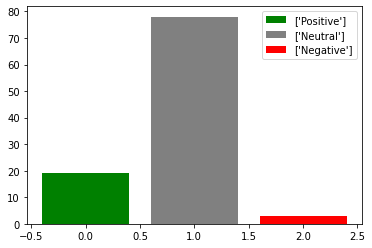

In [37]:
plt.bar([0], [len(df_pos)], label=['Positive'], color=['green'])
plt.bar([1], [len(df_neu)], label=['Neutral'], color=['grey'])
plt.bar([2], [ len(df_neg)], label=['Negative'], color=['red'])
plt.legend()
plt.show() 

In [38]:
print(len(df_neg))
print(len(df_pos))
print(len(df_neu))

3
19
78


In [39]:
import collections
from collections import Counter


In [40]:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

neutral_words = pd.DataFrame([dict(Counter(' '.join(df_neu['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [41]:
positive_words

Index(['cardano', 'ada', 'happy', 'time', 'climb', 'make', 'investor', 'iag',
       'people', 'project', 'space', 'nft', 'vasil', 'easily', 'token',
       'optionstrading', 'best', 'connecting', 'enjoyed', 'fun', 'today',
       'virginity', 'speaker', 'twitter', 'broke', 'ethereum', 'eth', 'sqz',
       'goal', 'alert', 'bot', 'trading', 'free', 'asleep', 'fall', 'buy',
       'rally', 'ready', 'still', 'antic', 'chattin', 'help', 'cnt', 'milky',
       'converted', 'lot', 'experienced', 'since', 'via', 'cryptonews',
       'suspend', 'delegators', 'luck', 'epoch', 'stake', 'solana', 'pool',
       'person', 'influential', 'whale', 'congratulation', 'fou', 'gospel',
       'community', 'place', 'providing', 'adoption', 'wider', 'information',
       'made', 'midnight', 'hard', 'virtual', 'video', 'check', 'abso',
       'track', 'whole', 'technology', 'forward', 'world', 'taking',
       'creativity', 'level', 'fork', 'ahead', 'amp', 'health', 'assessing',
       'news', 'crypto', '

In [42]:
negative_words

Index(['cardano', 'tough', 'something', 'people', 'new', 'help', 'manner',
       'digestible', 'well', 'simply', 'broken', 'advanced', 'pool', 'either',
       'small', 'staking', 'coin', 'like', 'ponzi', 'see', 'thing', 'one',
       'coming'],
      dtype='object')

In [43]:
# DATAFRAME OF SENTIMENT ANALYSIS OF THE COINS

# initialize list of lists
data = [['Positive', len(positive_words)], ['Neutral', len(neutral_words)], ['Negative', len(negative_words)]]



In [44]:
df = pd.DataFrame(data, columns=['Positive', 'Neutral', 'Negative'])

ValueError: 3 columns passed, passed data had 2 columns

In [45]:
data = {'Name': ['ADA'],
        'Positive': [len(df_pos)],
        'Neutral':[len(df_neu)],
        'Negative': [len(df_neg)] }


In [46]:
data = pd.DataFrame(data)
data

,Name,Positive,Neutral,Negative
0,ADA,19,78,3


In [47]:
data.to_csv('ADA_sentiment_analysis.csv')

In [112]:
##positive_words_df = pd.DataFrame(positive_words)

In [262]:
#negative_words_df = pd.DataFrame(negative_words)

In [263]:
#negative_words_df

In [265]:
#tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)
#tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [266]:
# df['category'].value_counts().plot(kind='bar')


In [274]:
plt.bar((positive_words).value_counts(), label=['Positive'], color=['green'])
plt.bar((negative_words).value_counts(), label=['Negative'], color=['red'])
plt.legend()
plt.show() 

TypeError: bar() missing 1 required positional argument: 'height'

In [268]:
#new_date = []

#for i in tweetsdf['date']:
   # a[5] + ' ' + a[1] + ' ' + a[2] + ' ' + a[3]
   # print(new_date)

In [269]:
## example

#new = []
#for tw in api.search_tweets(search, count=100):
 #   date = tw._json['created_at']
 #   text = tw._json['text']
 #   new.append({'date': date, 'text': text})

In [270]:
##user = api.get_user(screen_name = 'cryptofeednews')._json
#user['id']

950294018721763328